<a href="https://colab.research.google.com/github/Priya-Challagundla/fml-lab/blob/main/Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
rcParams['figure.figsize']=10,6

In [19]:
data = pd.read_csv('AirPassengers.csv')
data.shape
data.tail(3)

,Month,#Passengers
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [20]:
#converting into date with day also
data['Month'] = pd.to_datetime(data['Month'] , infer_datetime_format = True)
indexData = data.set_index(['Month'])
indexData.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


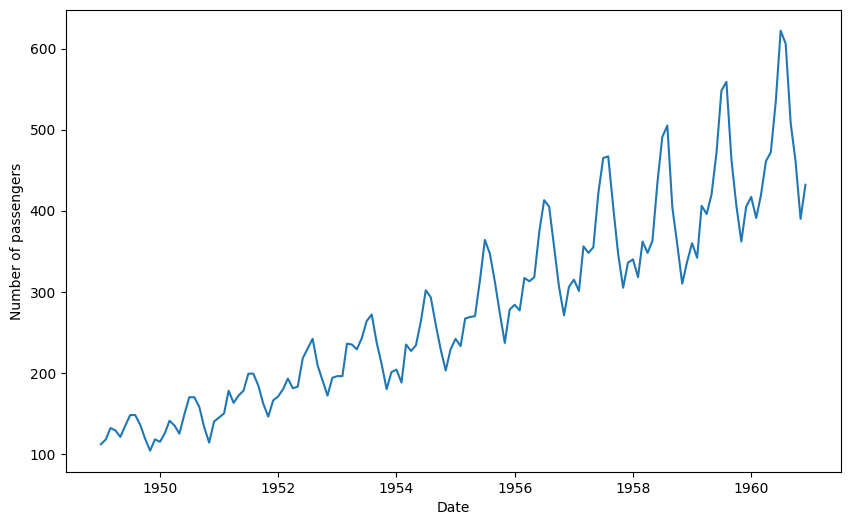

In [21]:
plt.xlabel("Date")
plt.ylabel("Number of passengers")
plt.plot(indexData)

In [22]:
rolmean = indexData.rolling(window=12).mean()
rolstd = indexData.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


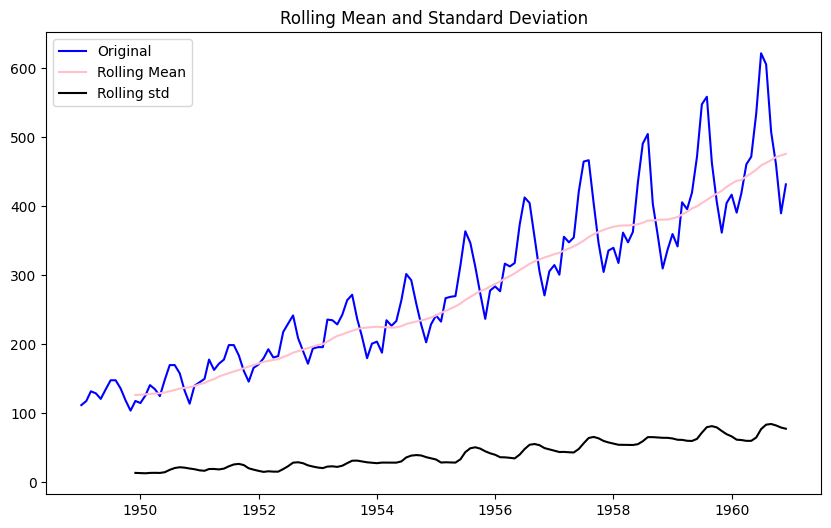

In [23]:
orig = plt.plot(indexData , color = 'blue' , label = 'Original')
mean = plt.plot(rolmean , color = 'pink' , label = 'Rolling Mean')
std = plt.plot(rolstd , color = 'black' , label = 'Rolling std')
plt.legend(loc = 'best')
plt.title("Rolling Mean and Standard Deviation")
plt.show()

In [26]:
result = adfuller(indexData['#Passengers'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values: ')
for key , value in result[4].items():
  print('\t{}: {}'.format(key , value))

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values: 
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


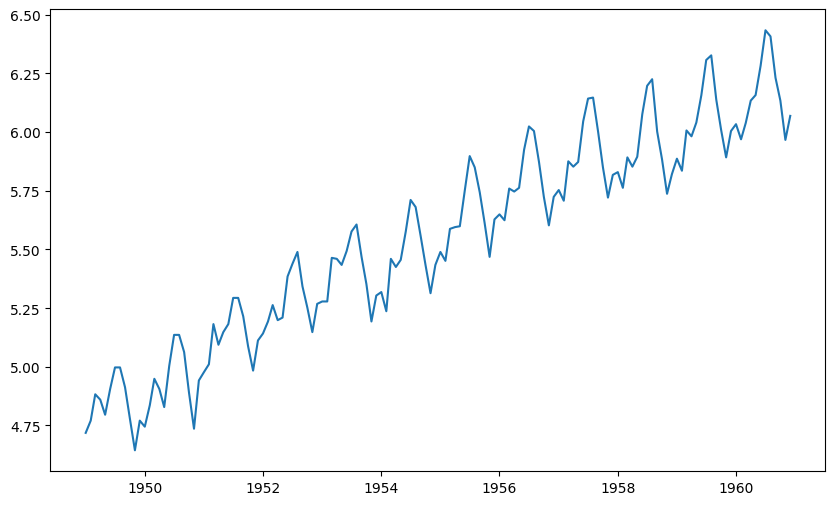

In [27]:
df_log = np.log(indexData)
plt.plot(df_log)

In [29]:
def get_stationarity(timeseries):
  rolling_mean = timeseries.rolling(window = 12).mean()
  rolling_std = timeseries.rolling(window = 12).std()

  original = plt.plot(timeseries, color = 'blue' , label = 'Original')
  mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
  std = plt.plot(rolling_std, color='black' , label = 'Rolling Std' )
  plt.legend(loc='best')
  plt.title('Rolling_Mean & Standard Deviation')
  plt.show(block = False)

  result = adfuller(timeseries['#Passengers'])
  print('ADF Statistic: {}'.format(result[0]))
  print('p-value: {}'.format(result[1]))
  print('Critical Values: ')
  for key,value in result[4].items():
    print('\t{}: {}'.format(key , value))

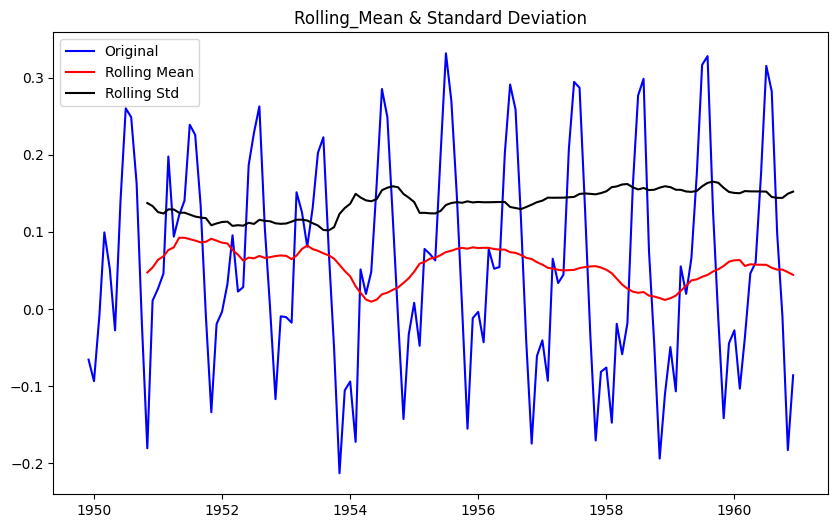

ADF Statistic: -3.1629079913008833
p-value: 0.022234630001242206
Critical Values: 
	1%: -3.4865346059036564
	5%: -2.8861509858476264
	10%: -2.579896092790057


In [31]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace = True)
get_stationarity(df_log_minus_mean)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


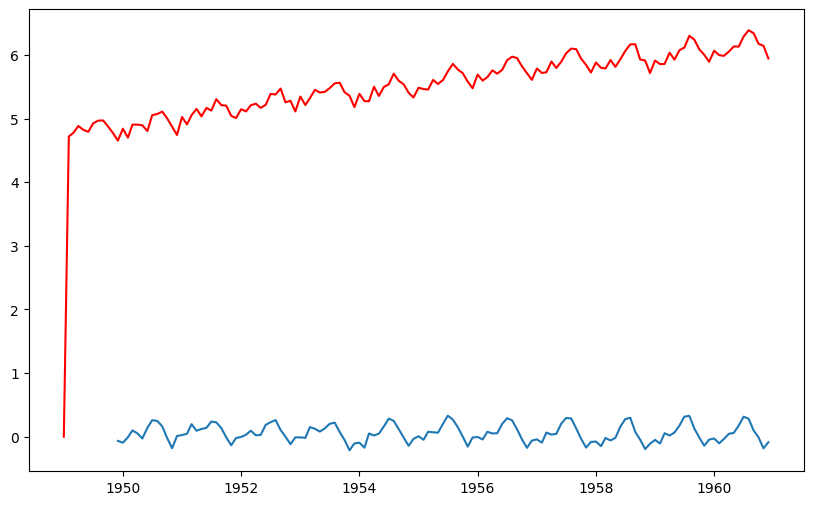

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose



decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit()
plt.plot(df_log_minus_mean)
plt.plot(results.fittedvalues , color='red')

AttributeError: ignored